In [1]:
import matplotlib.pyplot as plt 
import pickle
import numpy as np
import json
import seaborn as sns
import pandas as pd
plt.rcParams.update({'font.size': 22})
def errmat2df(err):
    df_dict = {'x': [], 'err': [], 'method': []}

    # dataframe create
    for j in np.arange(err.shape[-1]):
        method_errs = err[:, :, j]
        assert method_errs.ndim == 2
        n_repeat, n_iters = method_errs.shape
        for i in range(n_repeat):
            method_x = np.arange(method_errs[i,:].size)
            df_dict['x'].extend(method_x.tolist())
            df_dict['err'].extend(method_errs[i,:].tolist())
            df_dict['method'].extend([j]*method_errs[i,:].size)
    df = pd.DataFrame(df_dict)
    df['method'] = df['method'].astype('category')
    df['method'] = df['method'].cat.rename_categories({0: 'OLS', 1:'2SLS', 2:'Ours'})
    return df

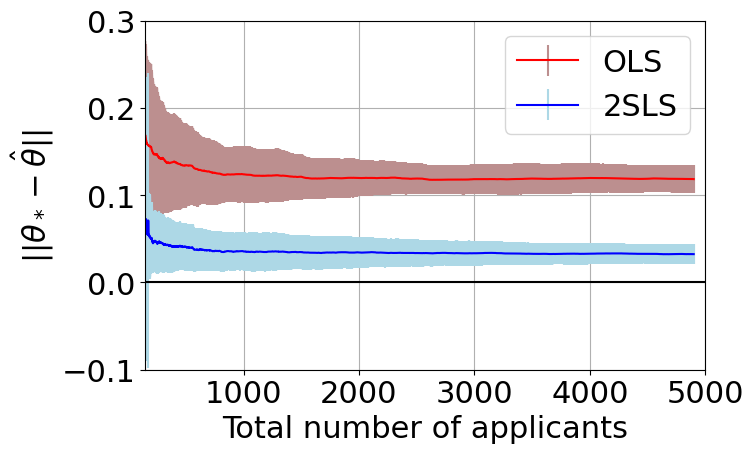

In [35]:
with open(f'experiments/clipped-yes-selection-yes-random-effort-matrix-d1-round100/data', 'rb') as f:
    data = pickle.load(f)
err = data['error_list_mean']
err = err
n_repeat, n_iters, _ = err.shape
fig,ax=plt.subplots(figsize=(8,5))
ax.errorbar(range(n_iters), err.mean(axis=0)[:,0], yerr=err.std(axis=0)[:,0], label='OLS', color='red', ecolor='rosybrown')
ax.errorbar(range(n_iters), err.mean(axis=0)[:,1], yerr=err.std(axis=0)[:,1], label='2SLS', color='blue', ecolor='lightblue')
# ax.errorbar(range(n_iters), err.mean(axis=0)[:,2], yerr=err.std(axis=0)[:,2], label='Ours', color='green', ecolor='lightgreen')
# ax.plot(range(n_iters), 1/(np.sqrt(range(n_iters)) + 1e-9), color='red',linestyle='dashed', linewidth=2, label='1/sqrt(T)')

# plt.xlim(200)
ax.legend()
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel('Total number of applicants')
ax.set_ylabel(r'$|| \theta_* - \hat{\theta} ||$')

ax.set_xlim((150, 5000))
ax.set_ylim((-0.1, 0.3))
ax.grid()

plt.tight_layout()
plt.savefig('figures/fig1.pdf')
# ax.set_xlabel('applicants / 2')
# ax.set_ylabel('estimation error of theta star')

<AxesSubplot:xlabel='x', ylabel='err'>

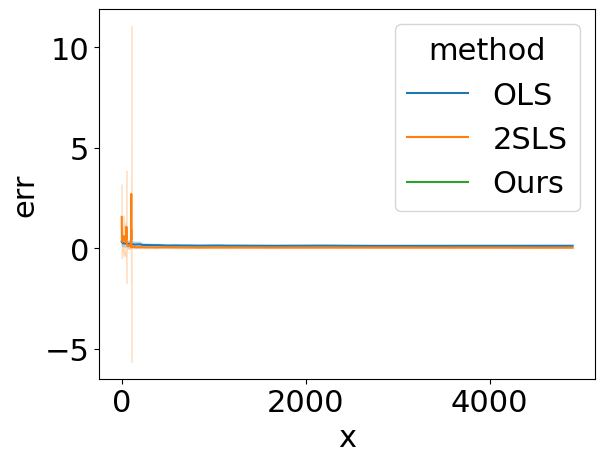

In [34]:
df =errmat2df(err)
df = df[df.method!='Ours']
fig,ax=plt.subplots()
sns.lineplot(
    data=df, x='x', y='err', hue='method', errorbar='sd'
)

FileNotFoundError: [Errno 2] No such file or directory: 'experiments/motivation-new/tsls-round2-admitall/data'

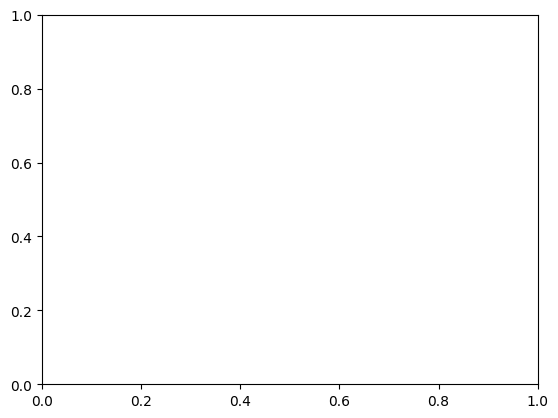

In [3]:

round=1000
for round in (2,10, 100, 500, 1000):
    fig,ax=plt.subplots()

    # without selection data.
    with open(f'experiments/motivation-new/tsls-round{round}-admitall/data', 'rb') as f:
        data = pickle.load(f)
    err = data['error_list_mean']
    err.shape
    assert err.ndim == 3
    n_repeat, n_iters, _ = err.shape
    nr1 = n_repeat
    ax.errorbar(
        range(n_iters), err.mean(axis=0)[:,0], yerr=err.std(axis=0)[:,0], label='OLS w/o selection', color='red', ecolor='rosybrown'
    )
    ax.errorbar(
        range(n_iters), err.mean(axis=0)[:,1], yerr=err.std(axis=0)[:,1], label='TSLS w/o selection', color='green', ecolor='lightgreen'
    )

    # with selection data
    with open(f'experiments/motivation-new/tsls-round{round}-admitsome/data', 'rb') as f:
        data = pickle.load(f)
    err = data['error_list_mean']
    err.shape
    assert err.ndim == 3
    n_repeat, n_iters, _ = err.shape
    nr2 = n_repeat

    ax.errorbar(
        range(n_iters), err.mean(axis=0)[:,0], yerr=err.std(axis=0)[:,0], label='OLS w/ selection', color='orange', ecolor='wheat'
    )
    ax.errorbar(
        range(n_iters), err.mean(axis=0)[:,1], yerr=err.std(axis=0)[:,1], label='TSLS w/ selection', color='darkblue', ecolor='lightblue'
    )

    # common settings
    ax.set_ylim(-.1, .25)
    ax.legend()
    ax.grid()
    ax.axhline(y=0, color='k')

    ax.set_title(f'rounds = {round} using n_repeats = {nr1, nr2}')


Text(0, 0.5, '$|| \\hat{\\theta}  - \\theta_*||$')

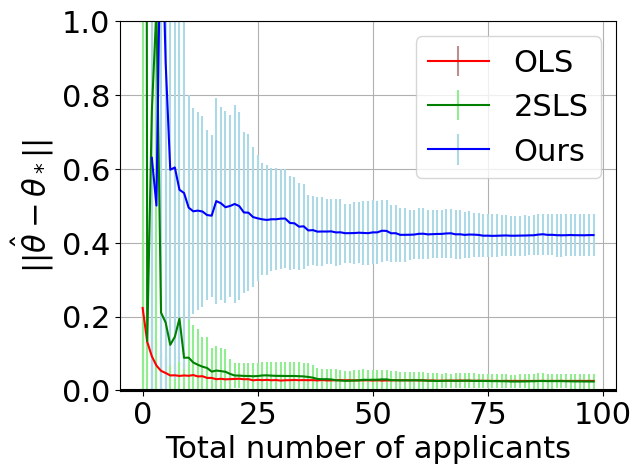

In [39]:
fig,ax=plt.subplots()

# without selection data.
with open(f'experiments/clipped-yes-selection-yes-fixed-effort-matrix-d1-scaled-duplicates-round1000/data', 'rb') as f:
    data = pickle.load(f)
err = data['error_list_mean']
# err = err[:]
assert err.ndim == 3
n_repeat, n_iters, _ = err.shape
nr1 = n_repeat
ax.errorbar(
    range(n_iters), err.mean(axis=0)[:,0], yerr=err.std(axis=0)[:,0], label='OLS', color='red', ecolor='rosybrown'
)
ax.errorbar(
    range(n_iters), err.mean(axis=0)[:,1], yerr=err.std(axis=0)[:,1], label='2SLS', color='green', ecolor='lightgreen'
)
ax.errorbar(
    range(n_iters), err.mean(axis=0)[:,-1], yerr=err.std(axis=0)[:,-1], label='Ours', color='blue', ecolor='lightblue'
)
ax.legend() 
ax.axhline(y=0, color='k')
# ax.set_xlim((3500,4000))
ax.set_ylim(bottom=-0.001, top=1)

ax.grid()
ax.set_xlabel('Total number of applicants')
ax.set_ylabel(r'$|| \hat{\theta}  - \theta_*||$')

In [7]:
err[:, -1, :].mean(axis=0), err[:, -1, :].max(axis=0),err[:, -1, :].min(axis=0)
import scipy.stats

scipy.stats.ttest_ind(
    err[:, -1, 2], 
    err[:, -1, 1], equal_var=False, nan_policy='raise'
)

Ttest_indResult(statistic=-3.8672011974763665, pvalue=0.00021154626882405512)

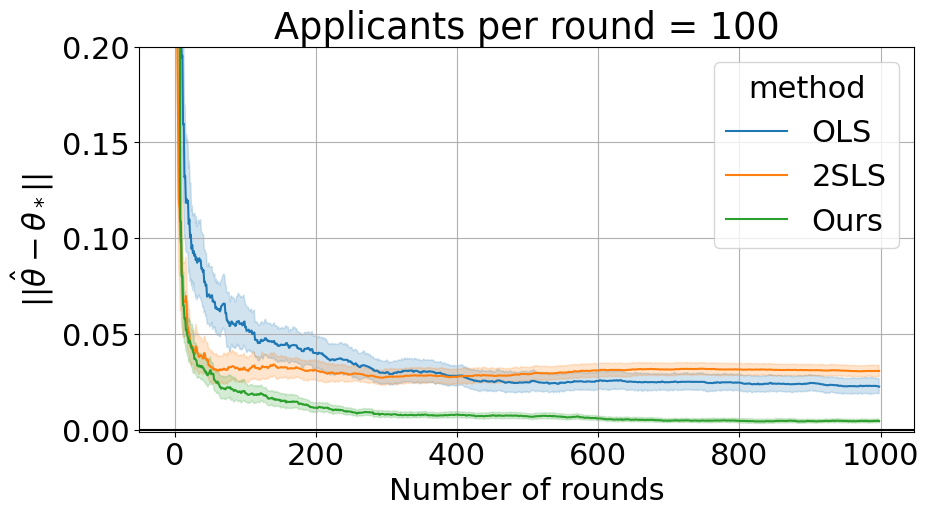

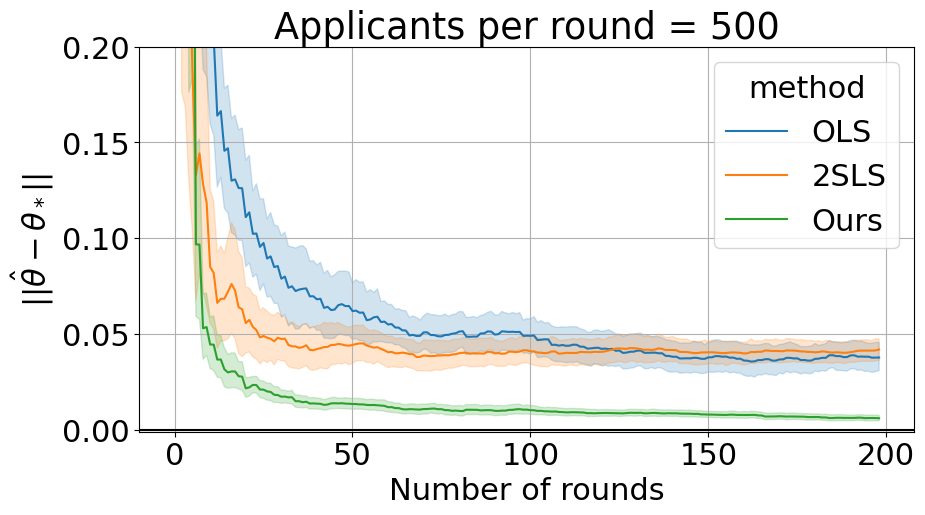

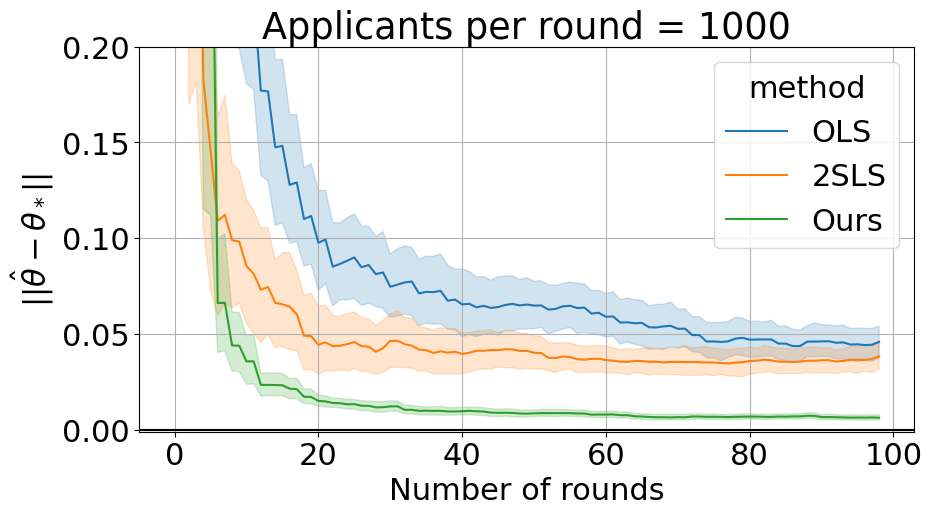

In [5]:
# confidence intervals. 
rounds = (100, 500, 1000)
for r in rounds:
    with open(f'experiments/clipped-no-selection-yes-fixed-effort-matrix-d1-scaled-duplicates-round{r}-obias10/data', 'rb') as f:
        data = pickle.load(f)
    err = data['error_list_mean']

    df = errmat2df(err)
    fig,ax=plt.subplots(figsize=(10,5))
    sns.lineplot(
        data=df, x='x', y='err', hue='method', errorbar=('ci', 95), ax=ax
    )
    plt.ylim(-0.001, 0.2)
    # plt.ylim(-0.001, 2)
    ax = plt.gca()
    ax.grid()
    ax.set_xlabel('Total number of applicants')
    ax.set_xlabel('Number of rounds')
    ax.set_title(f'Applicants per round = {r}')
    ax.set_ylabel(r'$||\hat{\theta} - \theta_*||$')
    ax.axhline(y=0, color='k')

    # plt.tight_layout()
    # plt.savefig('figures/fig.pdf')

<AxesSubplot:xlabel='settings', ylabel='error'>

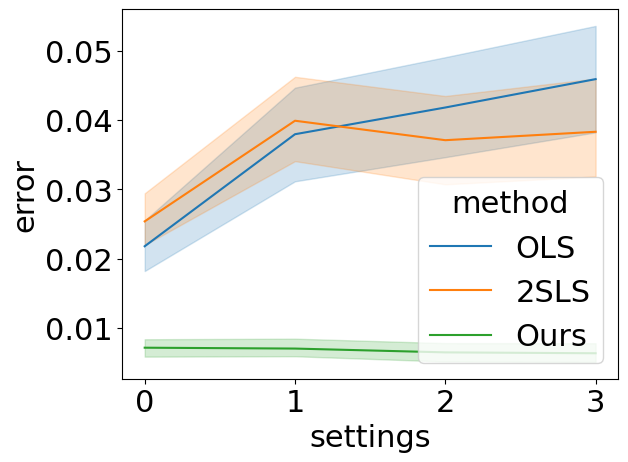

In [6]:
setting=((200, 0.4), (400, 0.9), (600, 1.3), (800, 1.8))
dfs = []
for i, s in enumerate( setting):
    with open(f'experiments-ablation/b1bias{s[0]}-b2bias{s[1]}/data', 'rb') as f:
        data = pickle.load(f)
    err= data['error_list_mean'][:, -1, :]
    err = np.concatenate((np.ones(shape=(50, 1))*i, err), axis=-1)
    df = pd.DataFrame(data=err, columns=('settings', 'OLS', '2SLS', 'Ours'))
    dfs.append(df)
    

df = pd.concat(dfs)
df['settings'] = df['settings'].astype('category')

df = pd.melt(
    df, id_vars='settings', value_vars=('OLS', '2SLS', 'Ours'), var_name='method', value_name='error'
)
sns.lineplot(
    df, x='settings', y='error', hue='method', errorbar=('ci', 95)
)

<AxesSubplot:xlabel='settings', ylabel='error'>

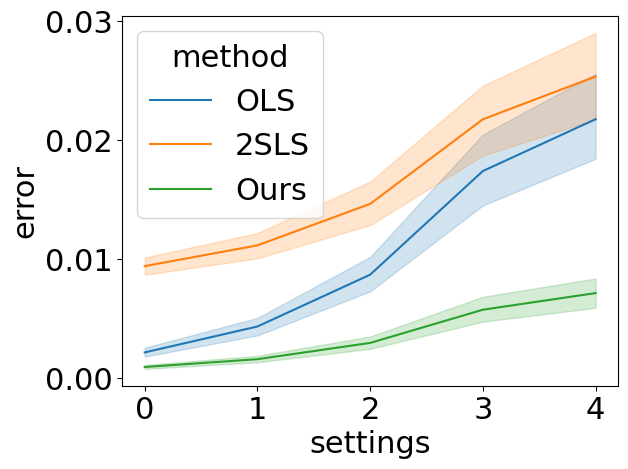

In [8]:
setting = (1, 2, 4, 8, 10)
dfs = []
for i, s in enumerate( setting):
    with open(f'experiments-ablation/obias{s}/data', 'rb') as f:
        data = pickle.load(f)
    err= data['error_list_mean'][:, -1, :]
    err = np.concatenate((np.ones(shape=(50, 1))*i, err), axis=-1)
    df = pd.DataFrame(data=err, columns=('settings', 'OLS', '2SLS', 'Ours'))
    dfs.append(df)
    

df = pd.concat(dfs)
df['settings'] = df['settings'].astype('category')
df = pd.melt(
    df, id_vars='settings', value_vars=('OLS', '2SLS', 'Ours'), var_name='method', value_name='error'
)
sns.lineplot(
    df, x='settings', y='error', hue='method', errorbar=('ci', 95)
)

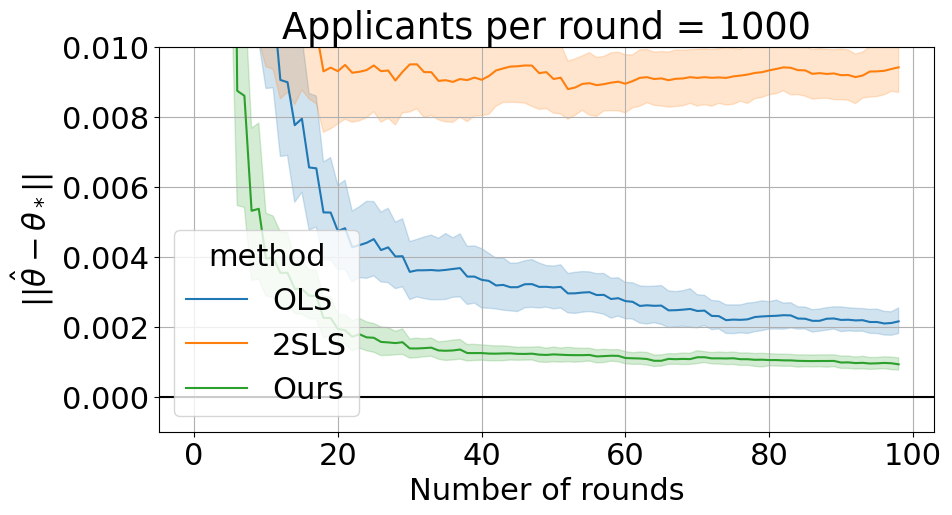

In [9]:
# confidence intervals. 
with open(f'experiments-ablation/obias1/data', 'rb') as f:
    data = pickle.load(f)
err = data['error_list_mean']

df = errmat2df(err)
fig,ax=plt.subplots(figsize=(10,5))
sns.lineplot(
    data=df, x='x', y='err', hue='method', errorbar=('ci', 95), ax=ax
)
plt.ylim(-0.001, 0.01)
# plt.ylim(-0.001, 2)
ax = plt.gca()
ax.grid()
ax.set_xlabel('Total number of applicants')
ax.set_xlabel('Number of rounds')
ax.set_title('Applicants per round = 1000')
ax.set_ylabel(r'$||\hat{\theta} - \theta_*||$')
ax.axhline(y=0, color='k')